# 1. Introdução

O tema escolhido foi a influência da quarentena induzida pela pandemia de covid-19 na popularidade do xadrez online em 2020.

A escolha deste tema foi motivada, em primeira instância, pela relação com eventos importantes que ocorreram recentemente no mundo, e pela hipótese conjecturada pelos integrantes do grupo de que o aumento do tempo passado em casa pelas pessoas resultaria em um aumento da popularidade de atividades de entretenimento on-line.

Uma dessas atividades é o xadrez online, que foi escolhido por ser uma área de maior conhecimento e interesse do grupo, e que também está no auge de sua popularidade de acordo com notícias e análises preliminares (alguma fonte aqui talvez).

Através do trabalho desejamos responder uma série de perguntas que auxiliarão na rejeição ou corroboração de nossa hipótese. São elas:

- Que foi o impacto da pandemia no número de jogadores?

- Quais países mais aumentaram em % de jogadores?

- Qual os horários de pico dos sites de xadrez?

- Qual a diferença na quantidade de homens e mulheres nos sites de xadrez online?

# 2. Visualizações dos Dados

In [18]:
# IMPORTS
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
# VISUALIZAÇÃO 
df = pd.read_csv("br_players.csv",engine="python")
df["last_online"] = pd.to_datetime(df["last_online"],unit="s")
df["date_joined"] = pd.to_datetime(df["date_joined"],unit="s")
df

,id,username,country,followers,last_online,date_joined,has_title,account_status,title,rating_bullet,rating_blitz,rating_rapid
0,5685093,-lh,BR,3,2021-02-02 04:55:32,2011-08-27 04:50:17,False,basic,None,1246,1545,0
1,115076418,000000tiago,BR,0,2021-02-01 19:21:29,2021-01-23 15:04:57,False,basic,None,1220,0,0
2,78469178,00000al,BR,1,2021-02-02 02:13:31,2020-05-03 10:41:46,False,basic,None,0,863,817
3,105481462,00000d,BR,0,2021-02-01 22:37:28,2020-12-19 09:09:51,False,basic,None,971,891,915
4,85274162,0002vinicius,BR,0,2021-02-02 00:00:14,2020-07-01 18:37:22,False,basic,None,901,537,0
...,...,...,...,...,...,...,...,...,...,...,...,...
140862,94845114,zzzsonolento,BR,0,2021-02-01 20:11:25,2020-11-02 18:39:56,False,basic,None,0,0,0
140863,88020990,zz_m,BR,0,2021-02-01 23:21:37,2020-07-31 23:31:45,False,basic,None,866,962,0
140864,5965057,_excel_,BR,1,2021-02-03 19:25:32,2011-10-16 17:12:05,False,basic,None,1637,1872,0
140865,117172078,victor_rafih,BR,1,2021-02-05 06:46:19,2021-01-30 20:50:57,False,basic,None,912,0,0


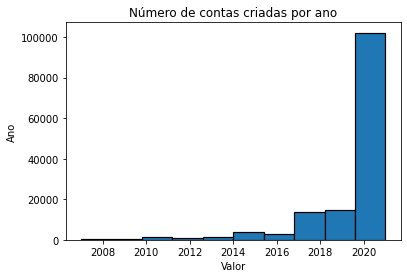

In [21]:
df["year"] = df["date_joined"].dt.year
plt.hist(df["year"],edgecolor="black",linewidth=1.2)
plt.title("Número de contas criadas por ano")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.show()

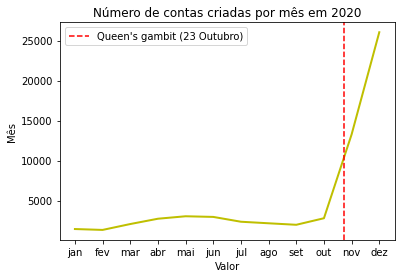

In [43]:
df["month"] = df["date_joined"].dt.month
players_per_month_2020 = df[["month","id"]][df["year"] == 2020].groupby(["month"]).count()
plt.plot(["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"],players_per_month_2020["id"],color='y',linewidth=2)
plt.axvline(x=9.74,color='r',linestyle='dashed',label="Queen's gambit (23 Outubro)")
plt.title("Número de contas criadas por mês em 2020")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.legend()
plt.show()
#print(players_per_month_2020)

In [51]:
df_partidas = pd.read_csv("matches_random.csv",engine="python")
df_partidas["end_time"] = pd.to_datetime(df_partidas["end_time"],unit="s")
df_partidas

,url,white_username,black_username,end_time,time_control,time_class,rules,rated
0,https://www.chess.com/live/game/5906460797,KoeJaoAnao,Guest9868104543,2020-12-07 07:23:59,600,rapid,chess,False
1,https://www.chess.com/live/game/5906471657,KoeJaoAnao,viirussz,2020-12-07 07:28:27,600,rapid,chess,False
2,https://www.chess.com/live/game/5906484776,KoeJaoAnao,viirussz,2020-12-07 07:31:32,600,rapid,chess,False
3,https://www.chess.com/live/game/5906511113,KoeJaoAnao,shubhamkathuria,2020-12-07 07:38:03,600,rapid,chess,False
4,https://www.chess.com/live/game/5906524959,KoeJaoAnao,5herlock21,2020-12-07 07:43:18,600,rapid,chess,False
...,...,...,...,...,...,...,...,...
1071380,https://www.chess.com/live/game/5946023984,andreduraes,cherryblossom23,2020-12-12 05:40:24,300,blitz,chess,True
1071381,https://www.chess.com/live/game/5950950742,andreduraes,champ678,2020-12-12 20:08:12,300,blitz,chess,True
1071382,https://www.chess.com/live/game/5950952714,shivendra2502,andreduraes,2020-12-12 20:09:43,300,blitz,chess,True
1071383,https://www.chess.com/live/game/5961323481,jonahlovejy,andreduraes,2020-12-14 03:27:06,300,blitz,chess,True
